<a href="https://colab.research.google.com/github/Bauero/Klasyfikacja_sl-w/blob/master/Klasyfikacja_binarna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10_000)

In [ ]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10_000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.0
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10_000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras import optimizers, losses, metrics

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

In [ ]:
x_val = x_train[:10_000]
partial_x_train = x_train[10_000:]

y_val = y_train[:10_000]
partial_y_train = y_train[10_000:]

In [ ]:
history = model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 4s 83ms/step - loss: 0.5190 - binary_accuracy: 0.7709 - val_loss: 0.3980 - val_binary_accuracy: 0.8586
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3109 - binary_accuracy: 0.8966 - val_loss: 0.3329 - val_binary_accuracy: 0.8643
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2299 - binary_accuracy: 0.9225 - val_loss: 0.2793 - val_binary_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 4s 146ms/step - loss: 0.1904 - binary_accuracy: 0.9353 - val_loss: 0.2907 - val_binary_accuracy: 0.8844
Epoch 5/20
30/30 [==============================] - 4s 126ms/step - loss: 0.1549 - binary_accuracy: 0.9499 - val_loss: 0.2880 - val_binary_accuracy: 0.8850
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1332 - binary_accuracy: 0.9563 - val_loss: 0.3340 - val_binary_accuracy: 0.8689
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - l

In [ ]:
list(history.history.keys())

['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy']

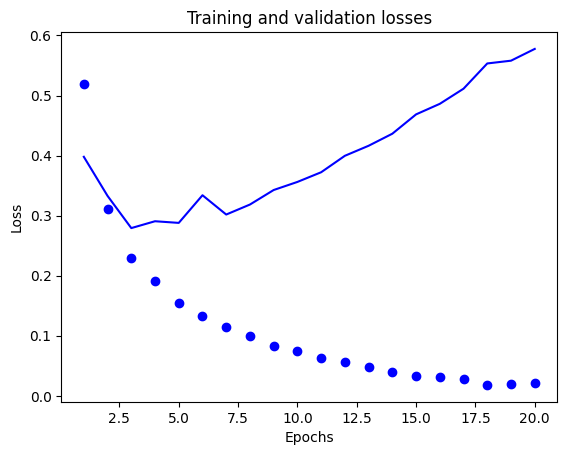

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")

plt.title("Training and validation losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

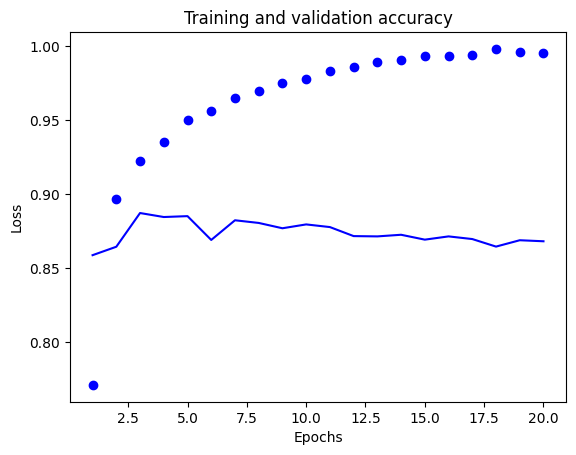

In [ ]:
loss_values = history_dict['binary_accuracy']
val_loss_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training accuracy")
plt.plot(epochs, val_loss_values, 'b', label="Validation accuracy")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 3s 4ms/step - loss: 0.6255 - binary_accuracy: 0.8591
[0.6255254745483398, 0.8591200113296509]


In [ ]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.03595114],
       [0.9999997 ],
       [0.8317766 ],
       ...,
       [0.00265704],
       [0.0112472 ],
       [0.9730068 ]], dtype=float32)

In [ ]:
y_test[1]

1.0